## Enquête : les étudiants et la ville

Nous considérons une partie des données issues de l'enquête "Les étudiants et la ville" effectuée en 2001 par des étudiants de sociologie à l'Université de Tours. Cet exemple est décrit dans : Crucianu M., Asselin de Beauville J-P., Boné
R., Méthodes factorielles pour l'analyse des données, Hermès-Lavoisier 2004.

__L'analyse porte sur cinq questions en rapport avec le logement étudiant. L'ensemble des individus statistiques est ici un échantillon de 383 étudiants.__

In [4]:
import pandas as pd
from fanalysis.mca import MCA
import matplotlib.pyplot as plt

In [5]:
df = pd.read_table("data/ex_acm.txt", header=0, index_col=0)
df

Mode    Type     Ancien       Eloign     Superf
1       NR1   Autre        NR3  plus_5km_NR   plus_30m
2       NR1   Autre        NR3     de_1_5km        NR5
3       NR1   Autre        NR3  plus_5km_NR        NR5
4       NR1   Autre        NR3  plus_5km_NR        NR5
5       NR1   Autre        NR3  plus_5km_NR        NR5
..      ...     ...        ...          ...        ...
379    Seul  Appart        NR3  plus_5km_NR  de_10_20m
380  Couple   Autre  de_1_3ans     de_1_5km   plus_30m
381    Seul     NR2  plus_3ans  plus_5km_NR  moins_10m
382   Coloc     NR2  moins_1an     de_1_5km   plus_30m
383     NR1   Autre  de_1_3ans  plus_5km_NR        NR5

[383 rows x 5 columns]

In [6]:
for i in range(5):
    print(df.iloc[:,i].unique())

['NR1' 'Seul' 'Coloc' 'Couple']
['Autre' 'NR2' 'Studio' 'Cite' 'Chamb' 'Appart']
['NR3' 'moins_1an' 'de_1_3ans' 'plus_3ans']
['plus_5km_NR' 'de_1_5km' 'moins_1km']
['plus_30m' 'NR5' 'de_10_20m' 'moins_10m' 'de_20_30m']


<img src="data/des_data.jpg" width=500 height=500 />

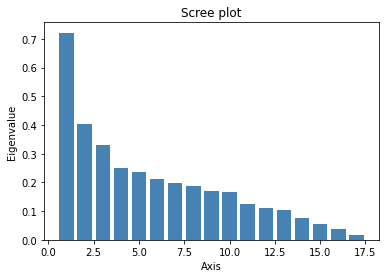

moyenne eigs 0.20000000000000007


In [15]:
x = df.values
x
#determination du nombre de dimensions pour l'ACM
mca = MCA()
mca.fit(x)
mca.plot_eigenvalues()
import numpy 
print("moyenne eigs", numpy.average(mca.eig_[0]))

In [17]:
print(mca.eig_[0])
#conclusion on conserve 6 dimensions pour l'analyse

[0.72152789 0.40328861 0.32884429 0.25190452 0.23609437 0.2104957
 0.19849951 0.18648254 0.17080041 0.16676493 0.12398298 0.11042419
 0.10424943 0.07469172 0.05531922 0.03845138 0.01817831]


In [21]:
mca_final = MCA(n_components = 6)
mca_final.fit(x)

MCA(n_components=6)

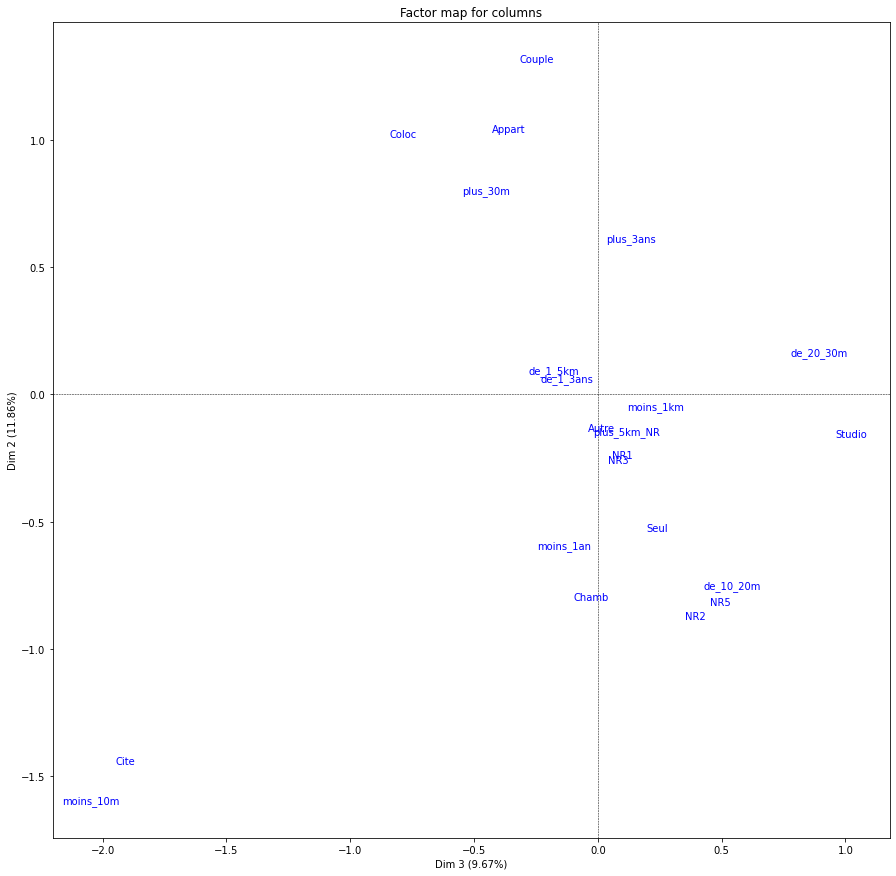

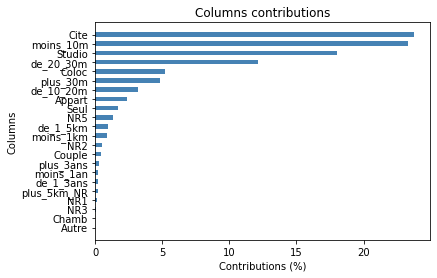

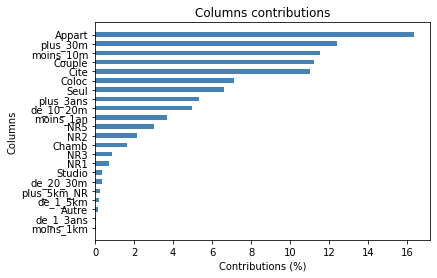

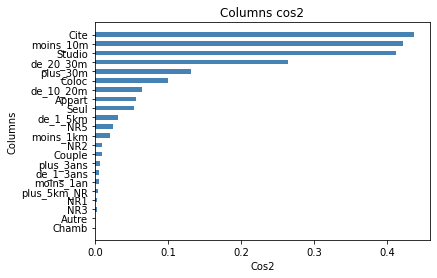

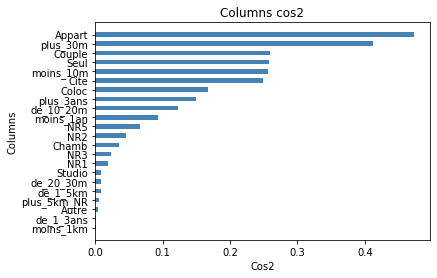

In [38]:
# Axe numéro 1 n'apporte pas d'informations utiles, il oppose les personnes qui on répondu à beaucoup de question et ceux qui on répondu à peu.

mca_final.mapping_col(num_x_axis = 3, num_y_axis =2,figsize=(15,15))
mca.plot_col_contrib(num_axis=3)
mca.plot_col_contrib(num_axis=2)

mca.plot_col_cos2(num_axis=3)
mca.plot_col_cos2(num_axis=2)

In [39]:
#Grace aux graphes des axes 2 et 3 on observe que l'on peut séparer les participants avec le critère de la  proximité avec l'université et avec le critère de "type" : vivre seul contre vivre en coloc et en couple.

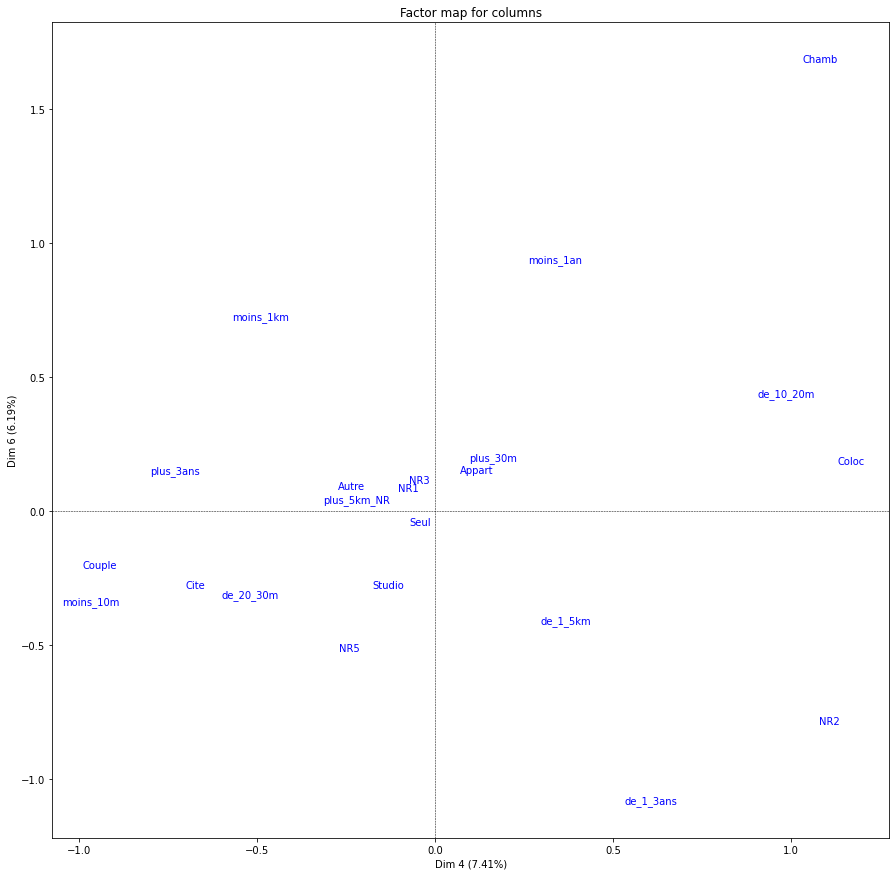

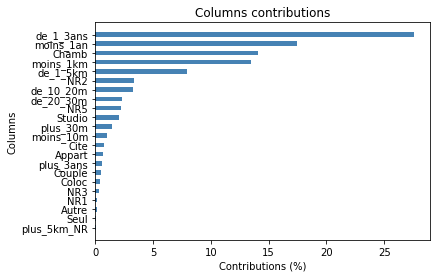

In [48]:
mca_final.mapping_col(num_x_axis=4,num_y_axis=6,figsize =(15,15))
mca.plot_col_contrib(num_axis=6)